This notebook visualizes the samples using PCA, both using all and top expressed genes.

In [1]:
import os, pandas, numpy
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':30, 'ytick.labelsize':30, 'figure.figsize':(16, 9), 'axes.labelsize':40})

# 0. user-defined variables

In [3]:
tpm_file = '/home/adrian/projects/nautholsvik/results/tpm/sleuth_TPM_gene.csv'

# 1. read data

In [4]:
expression = pandas.read_csv(tpm_file, sep=',', index_col=0)
expression.shape

(40173, 18)

# 2. filter and transform

In [5]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(13382, 18)
(2041, 18)


In [6]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 2. visualize

## 2.1. substantial expression

In [7]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.37035306 0.19081314]


In [8]:
the_colors = []
for element in pca_substantial_expression.index:
    if 'with_IFN' in element:
        the_colors.append('tab:red')
    elif 'wo_IFN' in element:
        the_colors.append('tab:blue')
    else:
        print('error')
        
the_markers = []
for element in pca_substantial_expression.index:
    if 'WT' in element:
        the_markers.append('o')
    elif 'siCTRL' in element:
        the_markers.append('s')
    elif 'siMITF' in element:
        the_markers.append('*')
    else:
        print('error')

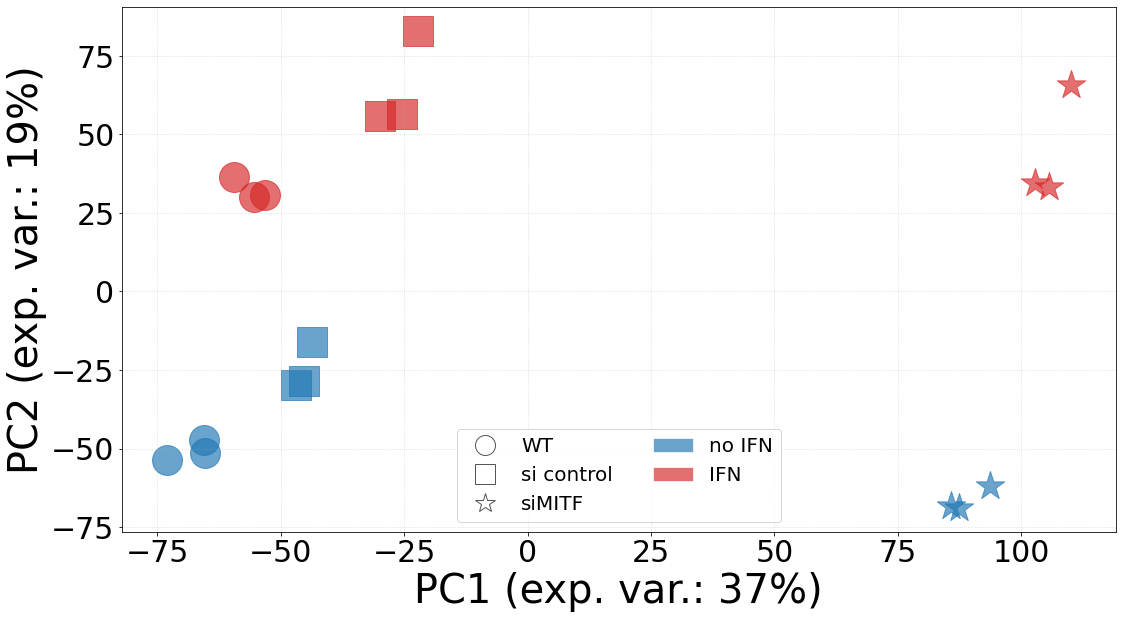

In [9]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=900, c=the_colors[i], marker=the_markers[i], alpha=2/3)
    
legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='*', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    
    matplotlib.patches.Patch(facecolor='tab:blue', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['WT', 'si control', 'siMITF', 'no IFN', 'IFN'], ncol=2, loc='lower center')

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

# 2.2. high expression

In [10]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.38162968 0.21439229]


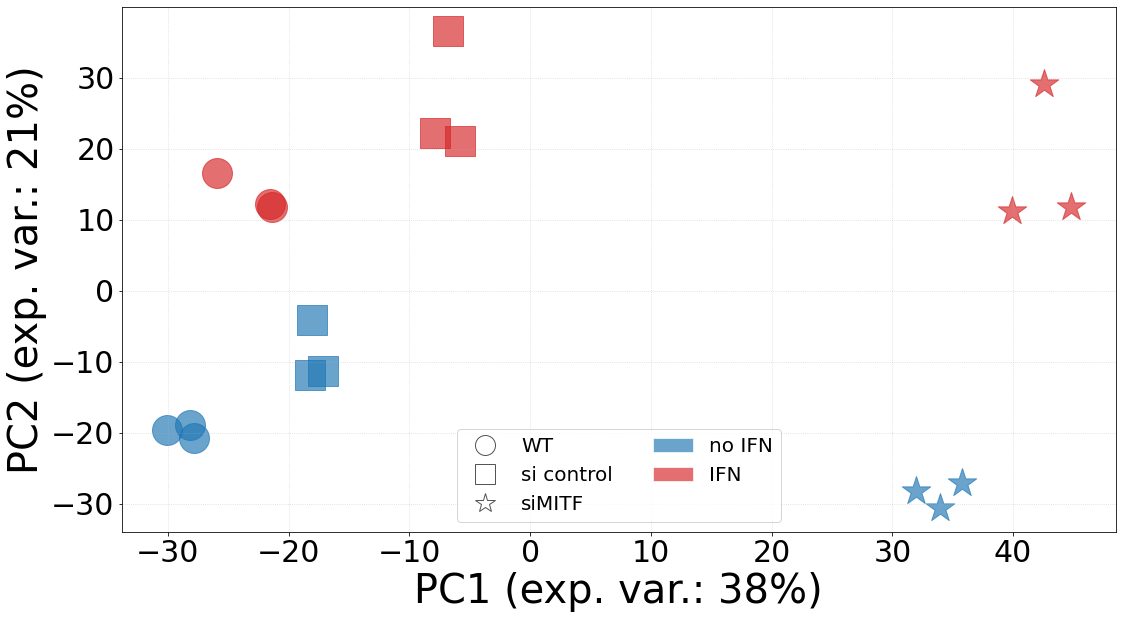

In [11]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=900, c=the_colors[i], marker=the_markers[i], alpha=2/3)
    
legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='*', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    
    matplotlib.patches.Patch(facecolor='tab:blue', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['WT', 'si control', 'siMITF', 'no IFN', 'IFN'], ncol=2, loc='lower center')
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()